## Data Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

### Import and preporcessing data

In [2]:
df_learning = pd.read_csv('census_income_learn.csv', header=None)
df_test = pd.read_csv('census_income_test.csv', header=None)

In [3]:
df_learning.dtypes

0       int64
1      object
2       int64
3       int64
4      object
5       int64
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16      int64
17      int64
18      int64
19     object
20     object
21     object
22     object
23     object
24    float64
25     object
26     object
27     object
28     object
29     object
30      int64
31     object
32     object
33     object
34     object
35     object
36      int64
37     object
38      int64
39      int64
40      int64
41     object
dtype: object

#### Add column names

In [4]:
meta = open("census_income_metadata.txt","r") 
dic = meta.readlines()[-42:]
header = []
for i in dic:
    if not i.startswith("|"):
        col = i.split(':')[0]
        header.append(col)

In [5]:
header.append('income')

In [6]:
df_learning.columns = header
df_test.columns = header

#### Find missing values

In [7]:
df_learning.replace(r"\?", np.NaN, inplace= True, regex= True)

In [8]:
df_learning.head().T

,0,1,2,3,4
age,73,58,18,9,10
class of worker,Not in universe,Self-employed-not incorporated,Not in universe,Not in universe,Not in universe
detailed industry recode,0,4,0,0,0
detailed occupation recode,0,34,0,0,0
education,High school graduate,Some college but no degree,10th grade,Children,Children
wage per hour,0,0,0,0,0
enroll in edu inst last wk,Not in universe,Not in universe,High school,Not in universe,Not in universe
marital stat,Widowed,Divorced,Never married,Never married,Never married
major industry code,Not in universe or children,Construction,Not in universe or children,Not in universe or children,Not in universe or children
major occupation code,Not in universe,Precision production craft & repair,Not in universe,Not in universe,Not in universe


In [9]:
df_learning[['detailed industry recode',
             'detailed occupation recode',
             'own business or self employed',
            'veterans benefits']] = df_learning[['detailed industry recode', 
                                                 'detailed occupation recode', 
                                                 'own business or self employed',
                                                'veterans benefits']].astype(object)

In [10]:
pd.isnull(df_learning).sum()/len(df_learning)

age                                           0.000000
class of worker                               0.000000
detailed industry recode                      0.000000
detailed occupation recode                    0.000000
education                                     0.000000
wage per hour                                 0.000000
enroll in edu inst last wk                    0.000000
marital stat                                  0.000000
major industry code                           0.000000
major occupation code                         0.000000
race                                          0.000000
hispanic origin                               0.000000
sex                                           0.000000
member of a labor union                       0.000000
reason for unemployment                       0.000000
full or part time employment stat             0.000000
capital gains                                 0.000000
capital losses                                0.000000
dividends 

Nearly half of the data is missing in columns which relate `migration`, lower than 3.5% of data is missing in columns about country of birth, and 0.35% of data is missing in column `state of previous residence`

#### Statistical description of numerical features

In [11]:
df_learning.describe().T

,count,mean,std,min,25%,50%,75%,max
age,199523.0,34.494199,22.310895,0.00,15.000,33.00,50.00,90.0
wage per hour,199523.0,55.426908,274.896454,0.00,0.000,0.00,0.00,9999.0
capital gains,199523.0,434.718990,4697.531280,0.00,0.000,0.00,0.00,99999.0
capital losses,199523.0,37.313788,271.896428,0.00,0.000,0.00,0.00,4608.0
dividends from stocks,199523.0,197.529533,1984.163658,0.00,0.000,0.00,0.00,99999.0
instance weight,199523.0,1740.380269,993.768156,37.87,1061.615,1618.31,2188.61,18656.3
num persons worked for employer,199523.0,1.956180,2.365126,0.00,0.000,1.00,4.00,6.0
weeks worked in year,199523.0,23.174897,24.411488,0.00,0.000,8.00,52.00,52.0
year,199523.0,94.499672,0.500001,94.00,94.000,94.00,95.00,95.0


### Plot histogram for numerical features

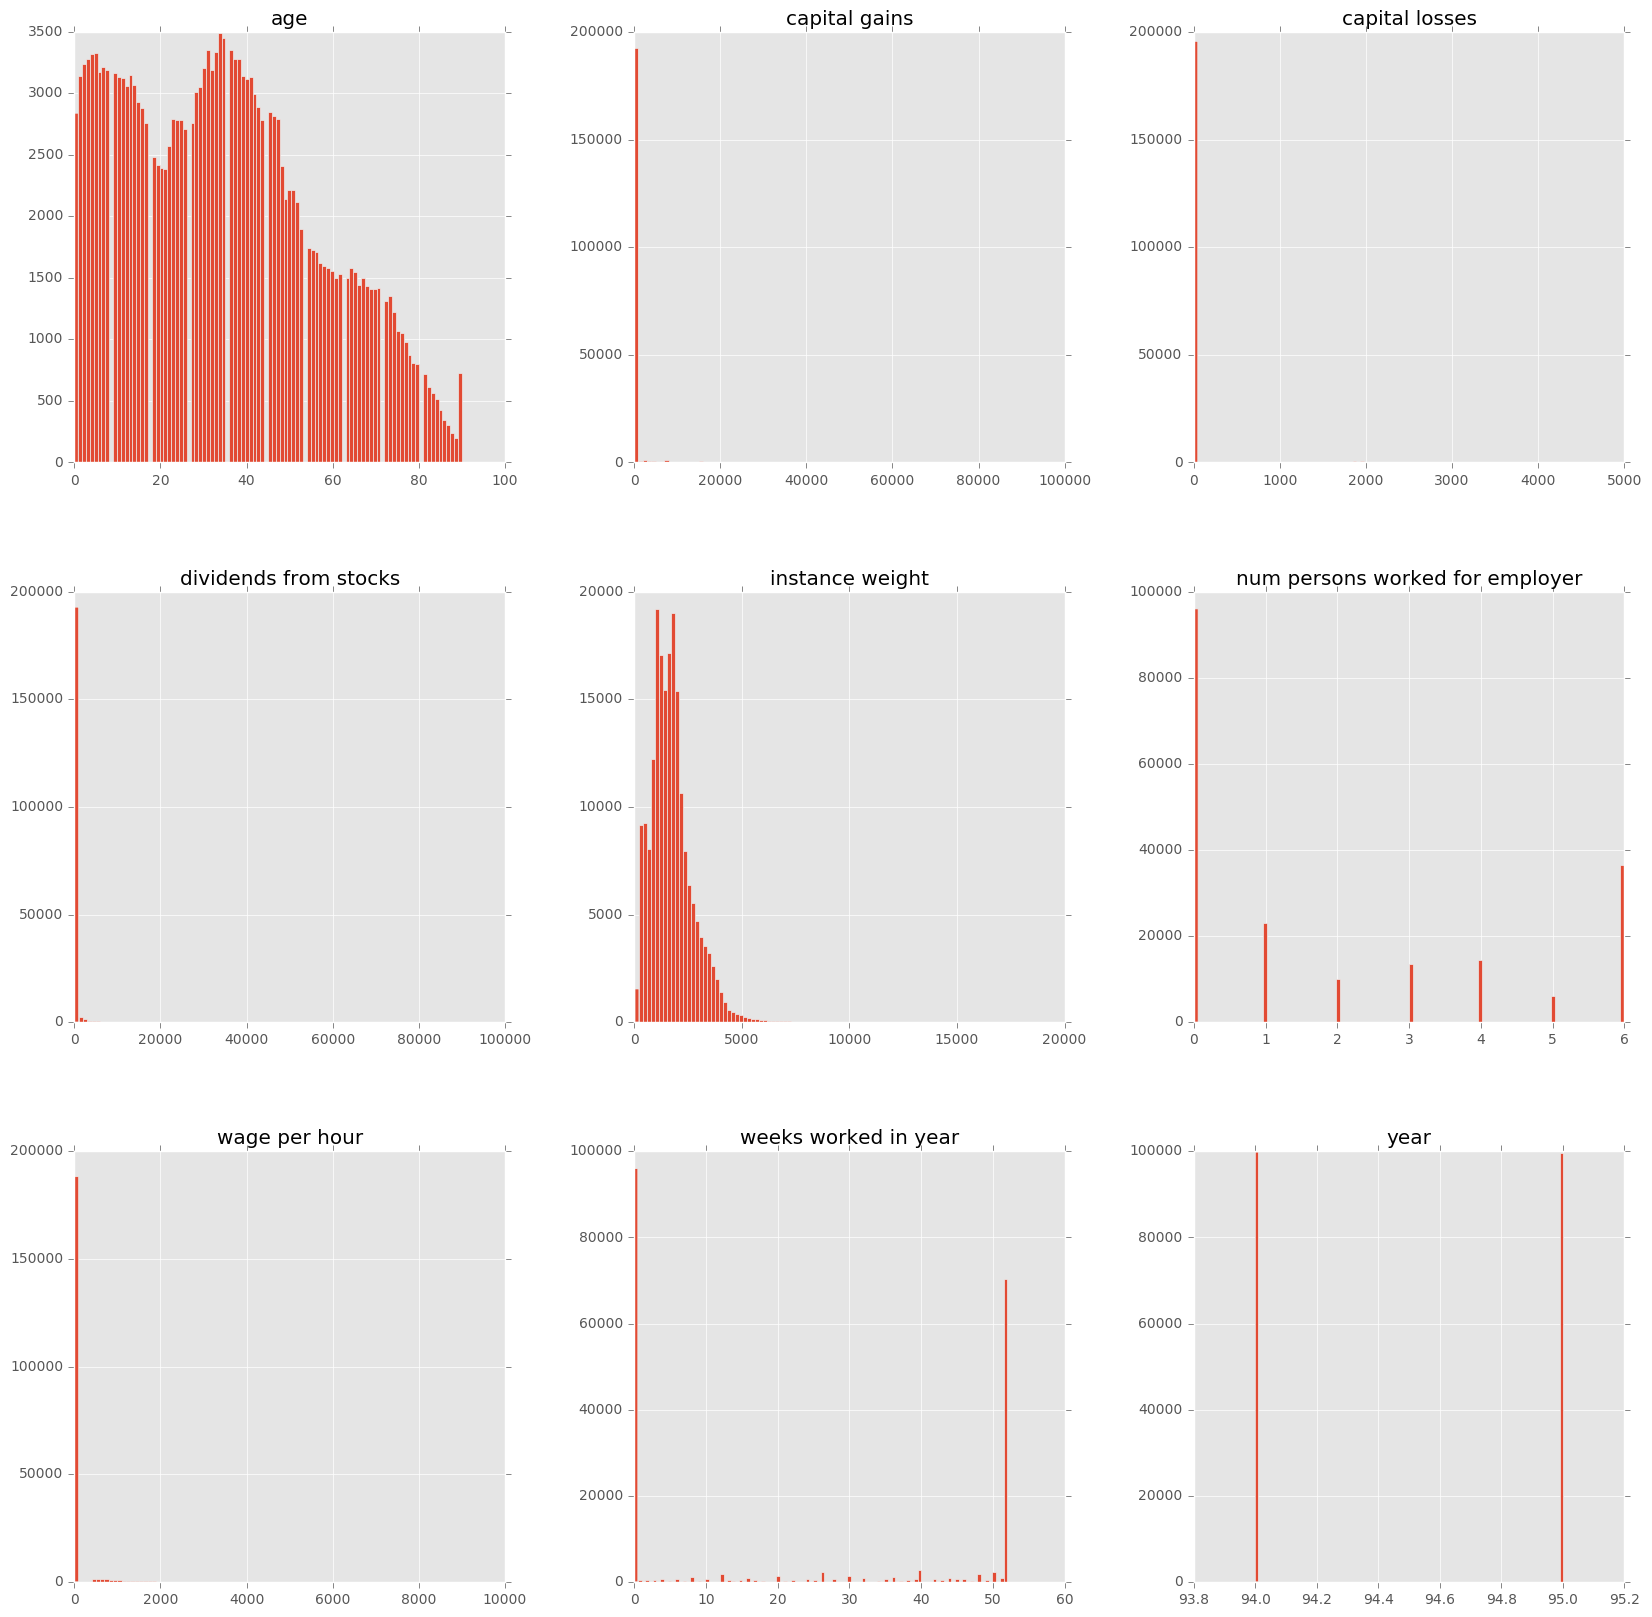

In [12]:
df_learning.hist(bins = 100,figsize = (20,20))
plt.show()

### Plot boxplot for numerical features

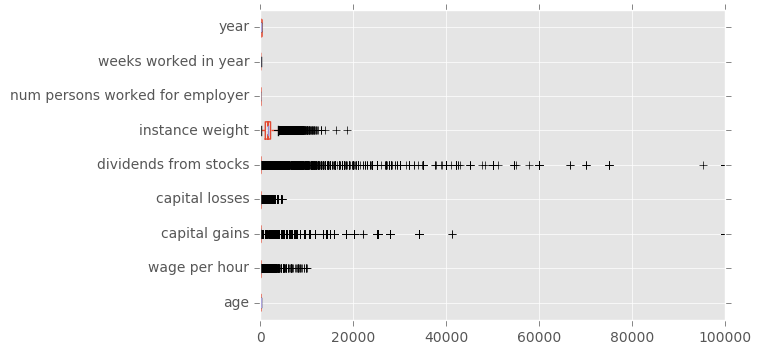

In [13]:
df_learning.boxplot(vert = False, notch= True, meanline = True)
plt.show()

### Plot barplot for categorical features

In [14]:
objectlist = df_learning.select_dtypes(include=['object']).columns.values
len(objectlist)

33

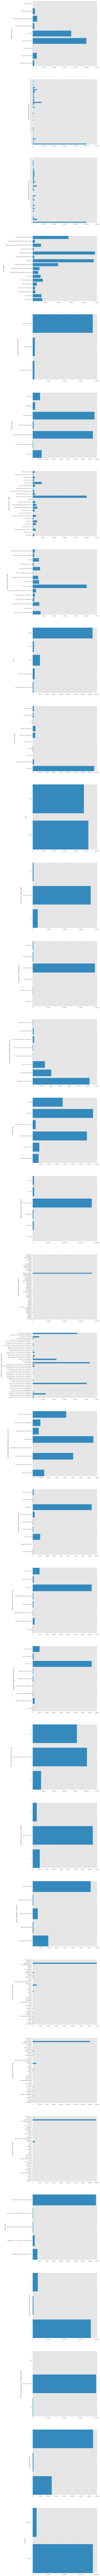

In [15]:
fig, axes = plt.subplots(nrows=33, ncols=1)
axes = axes.flatten()
fig.set_size_inches((10,400))
n = 0
for i in objectlist:
    temp = df_learning.groupby([i]).size()
    N = len(temp.index)
    ax = axes[n]
    ax.set_ylabel(i)
    ax.barh(range(N), temp.values, tick_label = temp.index, align = 'center')
    ax.autoscale()
    n += 1
plt.show()

### Build models

#### *Create dummy variables for categorical data

This is one of the most important steps in the whole challenge as it creates dummies variables for each categorical data so that they can be passed to the classifier.

Although decision tree and random forest can handle categorical data theoretically, scikit-learn has to be fed with dummy variables.

In [16]:
X_train = df_learning.filter(regex="[^income]")

In [17]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['float', 'int64'])
# drop instance weight column
X_train_num.drop(['instance weight'], axis = 1, inplace= True)

C:\Users\Henry\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
X_train_cat_dummies = pd.get_dummies(X_train_cat)

In [19]:
X_train_combined = pd.concat([X_train_cat_dummies, X_train_num], axis=1)

In [21]:
y_train = df_learning.filter(["income"])
y_train.replace(r'- 50000.', 0, regex = True, inplace = True)
y_train.replace(r'50000+.', 1, regex = True, inplace = True)
y_train = y_train['income']

In [22]:
X_train_combined_mat = np.array(X_train_combined)

#### Process test data

In [28]:
df_test.replace(r"\?", np.NaN, inplace= True, regex= True)
df_test[['detailed industry recode',
             'detailed occupation recode',
             'own business or self employed',
            'veterans benefits']] = df_learning[['detailed industry recode', 
                                                 'detailed occupation recode', 
                                                 'own business or self employed',
                                                'veterans benefits']].astype(object)
X_test = df_test.filter(regex="[^income]")
y_test = df_test.filter(["income"])
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['float', 'int64'])
# drop instance weight column
X_test_num.drop(['instance weight'], axis = 1, inplace= True)
X_test_cat_dummies = pd.get_dummies(X_test_cat)
X_test_combined = pd.concat([X_test_cat_dummies, X_test_num], axis=1)
y_test.replace(r'- 50000.', 0, regex = True, inplace = True)
y_test.replace(r'50000+.', 1, regex = True, inplace = True)
y_test = y_test['income']
X_test_combined_mat = np.array(X_test_combined)

C:\Users\Henry\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Train models

##### One of the most challenging:
After getting dummies of categorical data, the number of features gets so large that it takes a lot of time to train the model, which I cannot handle locally, so I just type the code below without running it.

##### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# use CV to find the best parameters

param_grid_dt = {'max_depth': range(1, 500)}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=10)
grid_dt.fit(X_train_combined_mat, y_train)

In [ ]:
# check the best parameters
print(grid_dt.best_params_)

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# use CV to find the best parameters
param_grid_lr = {'C': np.logspace(-3, 3, 10)}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=10)
grid_lr.fit(X_train_combined_mat, y_train)

In [ ]:
# check the best parameters
print(grid_lr.best_params_)

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# use CV to find the best parameters
param_grid_rf = {'n_estimators': range(1, 20)}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10)
grid_rf.fit(X_train_combined_mat, y_train)

In [ ]:
# check the best parameters
print(grid_rf.best_params_)

#### Test model on training data

In [ ]:
pred_train_dt = grid_dt.predict(X_train_combined_mat)
pred_train_lr = grid_lr.predict(X_train_combined_mat)
pred_train_rf = pred_rf.predict(X_train_combined_mat)

##### Draw Precision, Recall and F1 of training data to evaluate the model

Ideally, we should choose the model with the highest accuracy as well as the acceptable precision and recall.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_train_dt))
print(classification_report(y_test, pred_train_lr))
print(classification_report(y_test, pred_train_rf))

#### Test model on test data

In [ ]:
pred_dt = grid_dt.predict(X_test_combined_mat)
pred_lr = grid_lr.predict(X_test_combined_mat)
pred_rf = pred_rf.predict(X_test_combined_mat)

##### Draw Precision, Recall and F1 of test data to evaluate the model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dt))
print(classification_report(y_test, pred_lr))
print(classification_report(y_test, pred_rf))

##### Find the most correlated variables 

By calling attributes in the models, we can easily find the most correlated variables.

Again, due to the limits of computation, I cannot get the answers locally, but the method is the correct one to deal with such problem.

In [ ]:
print(grid_dt.best_estimator_.feature_importances_)
print(grid_lr.best_estimator_.coef_)
print(grid_rf.best_estimator_.feature_importances_)

### Something else

There is something else worth mentioning:

        1.The instance weight indicates the number of people in the population, which is not used in the model according to the instruction in census_income_metadata.txt. However, it actually can be passed to the models by setting the weights of each row. Theoretically, it will increase the accuracy.
        2.There is a large number of missing values in migration related columns, which is hard to intepret. I just ignore these NaNs by setting all related dummies 0. We can also include NaNs by setting NaN as an extra dummy variable. For numerical features, we can also use imputer to replace NaN with means, median, etc.
        3.For classification, I do not add regularization terms(l1 or l2) due to computation limits, therefore I do not need to normalization X. However, if we need to add regularization terms or use regression models, we should normalize X first before building models.